In [1]:
import sys
#sys.path.append("<InstallPath>\TechnicalDrawingPython")

In [2]:
import numpy as np
import math

In [3]:
from mpl_toolkits import mplot3d
from technicaldrawpy import Transformations,Sahne,Camera,Vertex,Edge,Surface,LinearObject,Cube,Sahnecams,Utilities

Eğik İzdüşüm Yöntemleri - Kavaliyer ($\beta,\alpha$)=($\frac{\pi}{4},\frac{\pi}{4}$)

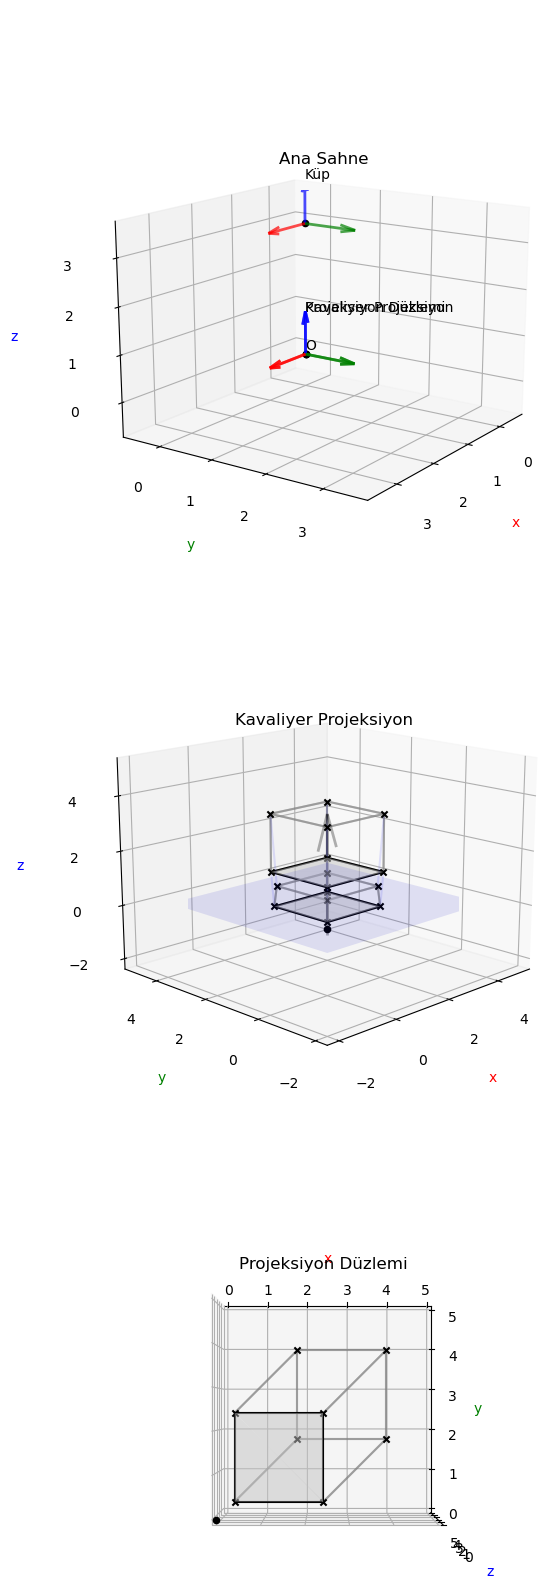

In [4]:
sahneU3_01=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",2) # 2 adet kamera tanımlanacak
sahneU3_01.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU3_01,"Kavaliyer Projeksiyon",None)
mycam1.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,True)
mycam2=Camera.Camera(90,8,-90,sahneU3_01,"Projeksiyon Düzlemi",[1,4])
mycam2.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,False,True,False,False,False)
sahneU3_01.addcamera(mycam1)
sahneU3_01.addcamera(mycam2)
mycube=Cube.Cube(2,2,2,sahneU3_01,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi
mycube.translate_xyz(0,0,3)
sahneU3_01.addobj(mycube)
sahneU3_01.calculate_positions_oblique(math.pi/4,math.pi/4) # beta, alpha
sahneU3_01.show()
mycam2.ax.invert_xaxis()

Eğik İzdüşüm Yöntemleri - Kabinet ($\beta,\alpha$)=($arctan(0.5),\frac{\pi}{4}$)

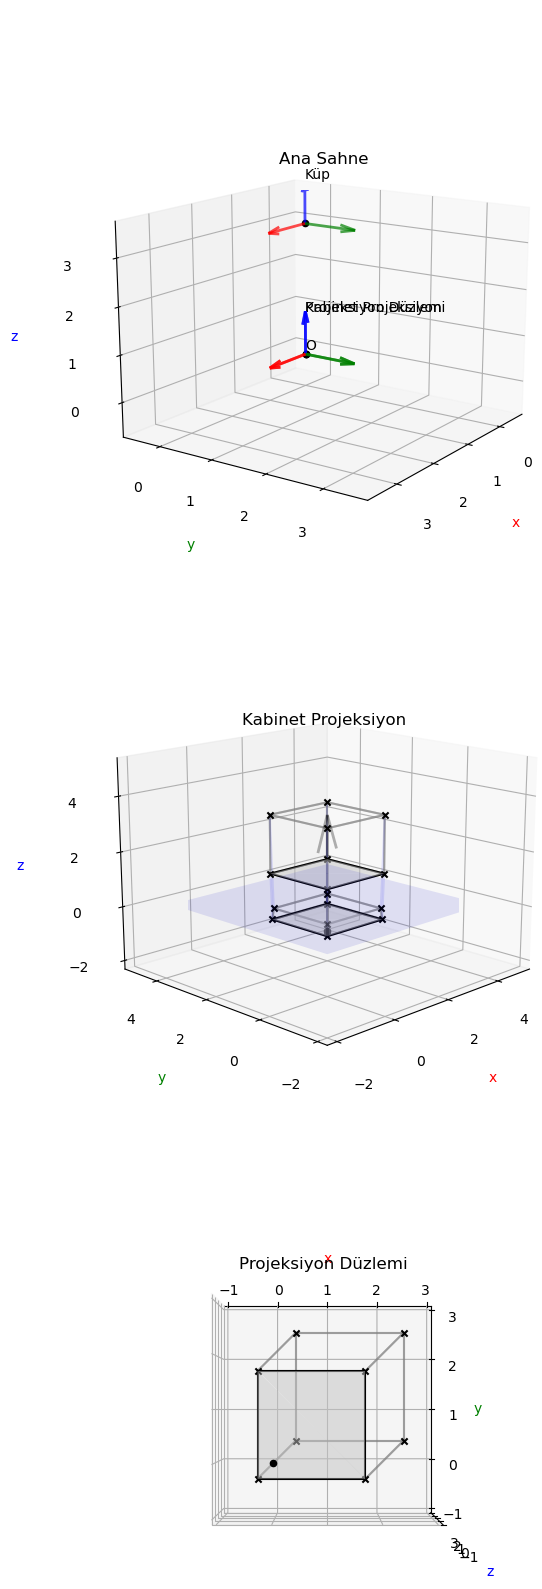

In [5]:
sahneU3_02=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",2) # 2 adet kamera tanımlanacak
sahneU3_02.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU3_02,"Kabinet Projeksiyon",None)
mycam1.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,True)
mycam2=Camera.Camera(90,8,-90,sahneU3_02,"Projeksiyon Düzlemi",[0,2])
mycam2.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,False,True,False,False,False)
sahneU3_02.addcamera(mycam1)
sahneU3_02.addcamera(mycam2)
mycube=Cube.Cube(2,2,2,sahneU3_02,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi
mycube.translate_xyz(0,0,3)
sahneU3_02.addobj(mycube)
sahneU3_02.calculate_positions_oblique(math.atan(0.5),math.pi/4) # beta, alpha
sahneU3_02.show()
mycam2.ax.invert_xaxis()

Eğik İzdüşüm Yöntemleri - Militer ($\beta,\alpha$)=($\frac{\pi}{4},\frac{\pi}{2}$), ayrıca küp nesnesinin $y$ ekseninde $-\frac{\pi}{3}$ kadar döndürülmesi gerekir

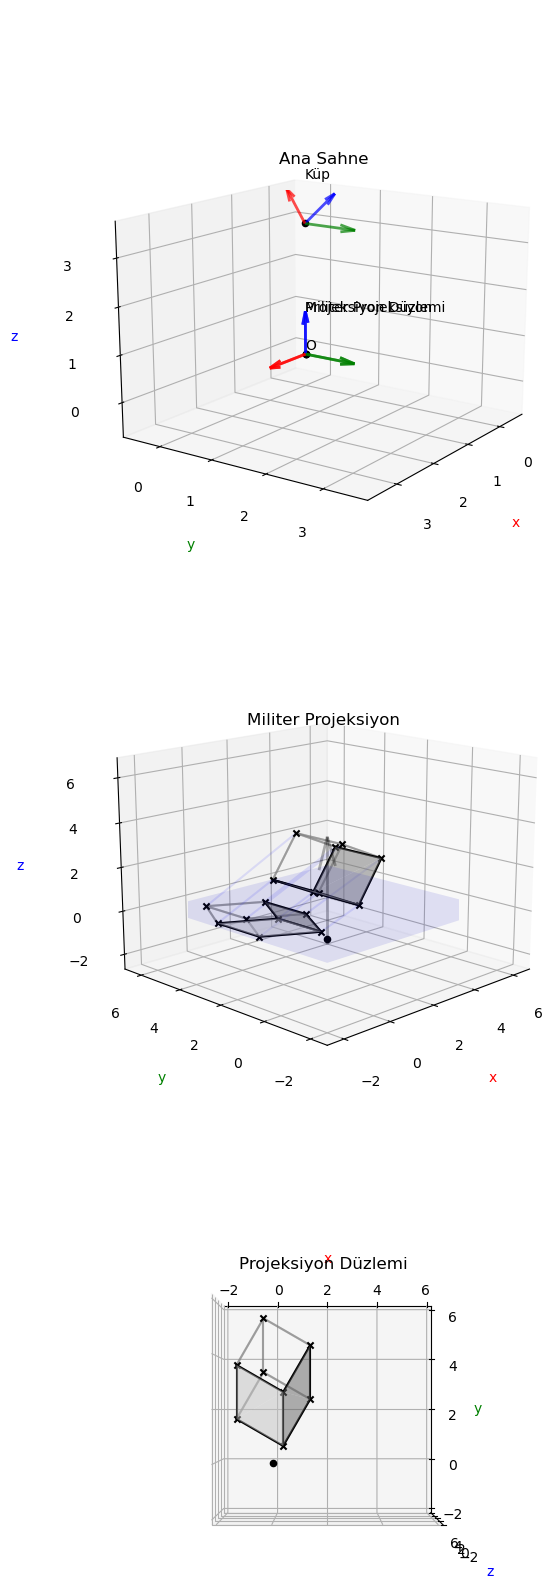

In [6]:
sahneU3_03=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",2) # 2 adet kamera tanımlanacak
sahneU3_03.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU3_03,"Militer Projeksiyon",None)
mycam1.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,True)
mycam2=Camera.Camera(90,8,-90,sahneU3_03,"Projeksiyon Düzlemi",[-1,5])
mycam2.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,False,True,False,False,False)
sahneU3_03.addcamera(mycam1)
sahneU3_03.addcamera(mycam2)
mycube=Cube.Cube(2,2,2,sahneU3_03,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi
mycube.rotate_y(-math.pi/3)
mycube.translate_xyz(0,0,3)
sahneU3_03.addobj(mycube)
sahneU3_03.calculate_positions_oblique(math.pi/4,math.pi/2) # beta, alpha
sahneU3_03.show()
mycam2.ax.invert_xaxis()

Bu bölümdeki hesaplamalarda $cos(\phi)=a$, $sin(\phi)=b$, $cos(\theta)=c$, $sin(\theta)=d$ eşitlikleri kısaltma olarak kullanılmıştır.

$$
\\
\mathbf{R_{xy}}(\Phi,\theta)=
\mathbf{R_x}(\Phi)\mathbf{R_y}(\theta)
\\
$$

$$
\\
=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & a & -b & 0\\
0 & b & a & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
c & 0 & d & 0\\
0 & 1 & 0 & 0\\
-d & 0 & c & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
\\
$$

$$
\\
=
\begin{bmatrix}
c & 0 & d & 0\\
bd & a & -bc & 0\\
-ad & b & ac & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
$$

Bir $\mathbf{m}$ bazından $\mathbf{R_{xy}}(\Phi,\theta)$ dönüşüm işlemi ile yeni bir $\mathbf{m'}$ bazı elde ettikten sonra $z$ ekseninde $\mathbf{P_z}$ projeksiyon işlemi uygulandığında $\mathbf{m'_p}$ projeksiyonu elde edilmiş olunur. 

$$
\\
\mathbf{m'_p}=\mathbf{P_{z}}\,\mathbf{R_{xy}}(\Phi,\theta)\,\mathbf{m}
\\
$$

$$
\\
=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
\begin{bmatrix}
c & 0 & d & 0\\
bd & a & -bc & 0\\
-ad & b & ac & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
\begin{bmatrix}
m_{11} & m_{12} & m_{13}\\
m_{21} & m_{22} & m_{23}\\
m_{31} & m_{32} & m_{33}\\
1 & 1 & 1\\
\end{bmatrix}
\\
$$

$$
\\
=
\begin{bmatrix}
c & 0 & d & 0\\
bd & a & -bc & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
\begin{bmatrix}
m_{11} & m_{12} & m_{13}\\
m_{21} & m_{22} & m_{23}\\
m_{31} & m_{32} & m_{33}\\
1 & 1 & 1\\
\end{bmatrix}
\\
$$

$$
\\
=
\begin{bmatrix}
c\,m_{11}+d\,m_{31} & c\,m_{12}+d\,m_{32} & c\,m_{13}+d\,m_{33}\\
b\,d\,m_{11}+a\,m_{21}-b\,c\,m_{31} & b\,d\,m_{12}+a\,m_{22}-b\,c\,m_{32} & b\,d\,m_{13}+a\,m_{23}-b\,c\,m_{33}\\
0 & 0 & 0\\
1 & 1 & 1\\
\end{bmatrix}
$$

Eğer

$$
\\
\mathbf{m}=
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
1 & 1 & 1\\
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{x} & \mathbf{y} & \mathbf{z}\\
\end{bmatrix}
$$ 

olursa,

$$
\\
\mathbf{m'_p}=
\begin{bmatrix}
c & 0 & d\\
bd & a & -bc\\
0 & 0 & 0\\
1 & 1 & 1\\
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{x'_p} & \mathbf{y'_p} & \mathbf{z'_p}\\
\end{bmatrix}
$$

olur. $0<\theta<\frac{\pi}{2}$ ve $\frac{-\pi}{2}<\Phi<0$ olarak kabul edildiğinde $\mathbf{m}$ ve $\mathbf{m'}$ için bir örnek aşağıda yer almaktadır.

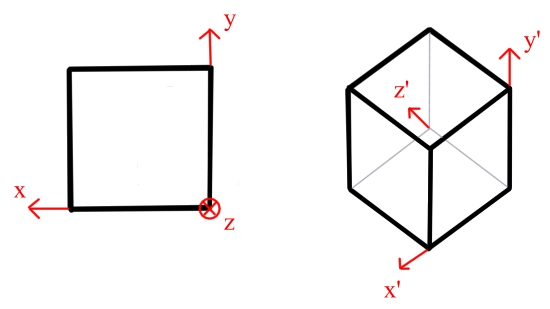

Aksonometrik görünüşlerde eksenlerin birbirlerine göre oranlarından yola çıkarak $\theta$ ve $\Phi$ açılarını bulmak mümkündür. Bu oranlar ($k>0$ olmak üzere) $k\,||x'_p||_2$, $k\,||y'_p||_2$ ve $k\,||z'_p||_2$ olarak verildiğinde, 

$||x'_p||_2^2=c^2+b^2d^2=1+(b^2-1)d^2=1-a^2d^2$

$||y'_p||_2^2=a^2$

$||z'_p||_2^2=d^2+b^2c^2=1+(b^2-1)c^2=1-a^2c^2$

Eksenlerin birbirlerine göre oranlarından,

$r_1^2=\frac{k^2||x'_p||_2^2}{k^2||y'_p||_2^2}=\frac{1-a^2d^2}{a^2}$

$r_2^2=\frac{k^2||z'_p||_2^2}{k^2||y'_p||_2^2}=\frac{1-a^2c^2}{a^2}$

Buradan, $d^2=\frac{1-a^2r_1^2}{a^2}$, $c^2=\frac{1-a^2r_2^2}{a^2}$ ve $c^2+d^2=1=\frac{2-a^2(r_1^2+r_2^2)}{a^2}$ eşitlikleri bulunur.

$a^2=\frac{2}{1+r_1^2+r_2^2}$ ve $\frac{-\pi}{2}<\Phi<0$ olduğundan $cos(\Phi)=\sqrt{\frac{2}{1+r_1^2+r_2^2}}$, $\Phi=-arccos(\sqrt{\frac{2}{1+r_1^2+r_2^2}})$

$d^2=\frac{1-a^2r_1^2}{a^2}$ ve $-\frac{\pi}{2}<\theta<\frac{\pi}{2}$ olarak kabul edilirse $sin(\theta)=\pm\sqrt{\frac{1-a^2r_1^2}{a^2}}$, $\theta=\pm arcsin(\sqrt{\frac{1-a^2r_1^2}{a^2}})$ olarak bulunur. Burada $a^2=cos(\phi)^2$ olduğunu hatırlatmak gerekir.

Eksenlerin birbirlerine göre oranları verildiğinde aşağıdaki fonksiyonu kullanarak $\theta$ ve $\Phi$ açılarını hesaplamak mümkündür.

In [7]:
axonometricthetaphi=Utilities.calculatefromratios_thetaphi([1,1,1])
print("Theta=",axonometricthetaphi[0])
print("Phi=",axonometricthetaphi[1])

Theta= 0.7853981633974484
Phi= -0.6154797086703874


İzometrik görünüşlerde eksenlerin oranları birbirlerine eşittir.

Dik İzdüşüm Yöntemleri - Aksonometrik (($\beta,\alpha$)=($0,0$)) - İzometrik ($k\,||x'_p||_2=1$, $k\,||y'_p||_2=1$, $k\,||z'_p||_2=1$)

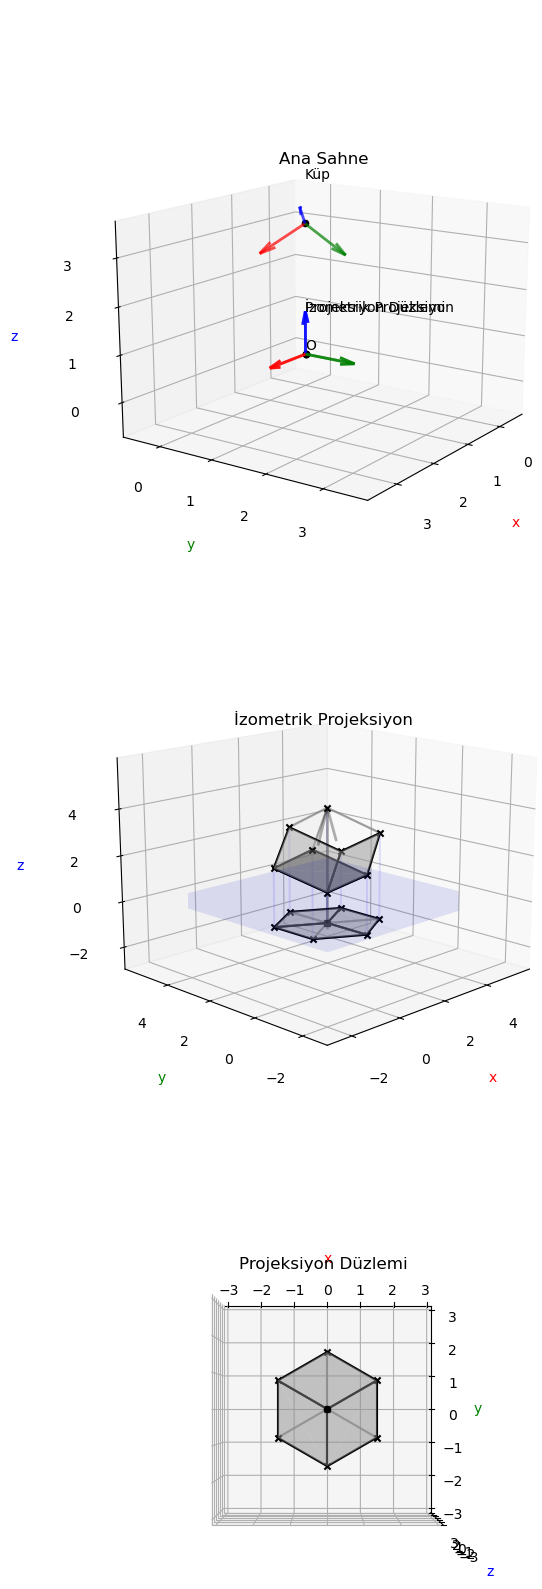

In [8]:
sahneU3_04=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",2) # 2 adet kamera tanımlanacak
sahneU3_04.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU3_04,"İzometrik Projeksiyon",None)
mycam1.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,True)
mycam2=Camera.Camera(90,8,-90,sahneU3_04,"Projeksiyon Düzlemi",[-2,2])
mycam2.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,False,True,False,False,False)
sahneU3_04.addcamera(mycam1)
sahneU3_04.addcamera(mycam2)
mycube=Cube.Cube(2,2,2,sahneU3_04,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi
axonometricthetaphi=Utilities.calculatefromratios_thetaphi([1,1,1])
axotheta=axonometricthetaphi[0]
axophi=axonometricthetaphi[1]
mycube.rotate_y(axotheta)
mycube.rotate_x(axophi)
mycube.translate_xyz(0,0,3)
sahneU3_04.addobj(mycube)
sahneU3_04.calculate_positions_oblique(0,0) # beta, alpha
sahneU3_04.show()
mycam2.ax.invert_xaxis()

Dimetrik görünüşlerde sadece iki adet eksenin oranları birbirlerine eşittir.

Dik İzdüşüm Yöntemleri - Aksonometrik (($\beta,\alpha$)=($0,0$)) - Dimetrik ($k\,||x'_p||_2=0.5$, $k\,||y'_p||_2=1$, $k\,||z'_p||_2=1$)

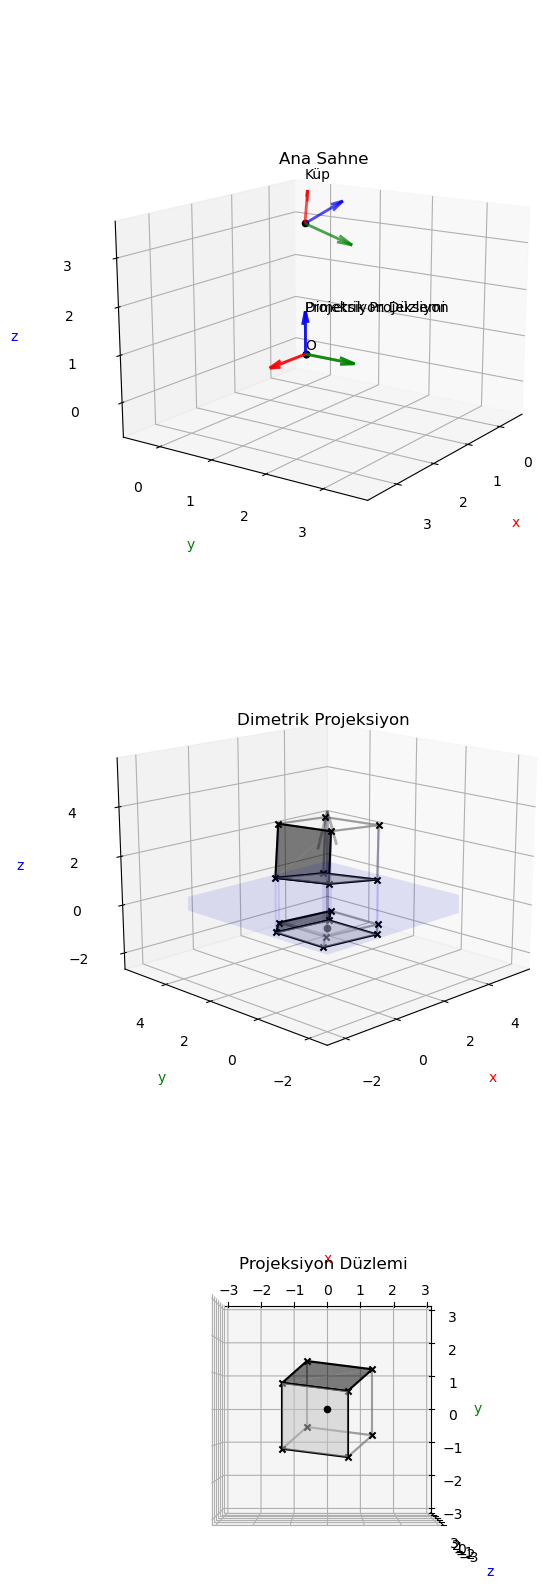

In [9]:
sahneU3_05=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",2) # 2 adet kamera tanımlanacak
sahneU3_05.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU3_05,"Dimetrik Projeksiyon",None)
mycam1.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,True)
mycam2=Camera.Camera(90,8,-90,sahneU3_05,"Projeksiyon Düzlemi",[-2,2])
mycam2.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,False,True,False,False,False)
sahneU3_05.addcamera(mycam1)
sahneU3_05.addcamera(mycam2)
mycube=Cube.Cube(2,2,2,sahneU3_05,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi
axonometricthetaphi=Utilities.calculatefromratios_thetaphi([0.5,1,1])
axotheta=axonometricthetaphi[0]
axophi=axonometricthetaphi[1]
#mycube.rotate_y(axotheta)
mycube.rotate_y(-axotheta)
mycube.rotate_x(axophi)
mycube.translate_xyz(0,0,3)
sahneU3_05.addobj(mycube)
sahneU3_05.calculate_positions_oblique(0,0) # beta, alpha
sahneU3_05.show()
mycam2.ax.invert_xaxis()

Dik İzdüşüm Yöntemleri - Aksonometrik (($\beta,\alpha$)=($0,0$)) - Dimetrik ($k\,||x'_p||_2=1$, $k\,||y'_p||_2=0.5$, $k\,||z'_p||_2=1$)

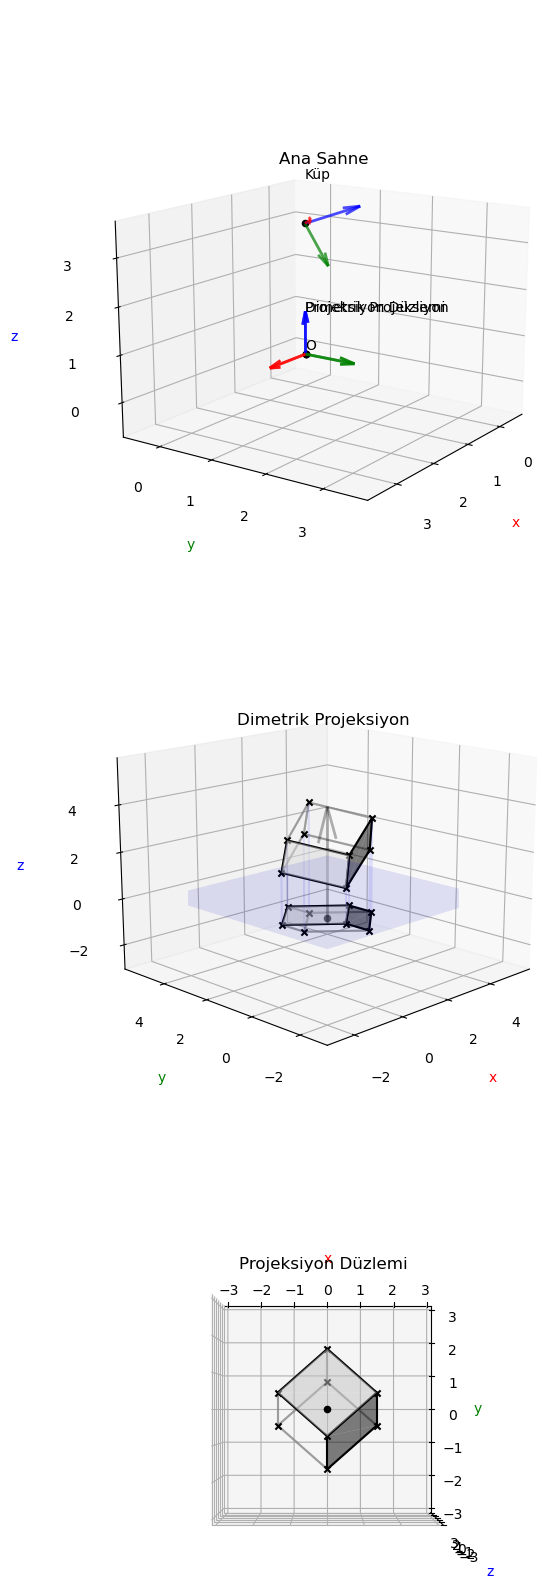

In [10]:
sahneU3_06=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",2) # 2 adet kamera tanımlanacak
sahneU3_06.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU3_06,"Dimetrik Projeksiyon",None)
mycam1.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,True)
mycam2=Camera.Camera(90,8,-90,sahneU3_06,"Projeksiyon Düzlemi",[-2,2])
mycam2.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,False,True,False,False,False)
sahneU3_06.addcamera(mycam1)
sahneU3_06.addcamera(mycam2)
mycube=Cube.Cube(2,2,2,sahneU3_06,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi
axonometricthetaphi=Utilities.calculatefromratios_thetaphi([1,0.5,1])
axotheta=axonometricthetaphi[0]
axophi=axonometricthetaphi[1]
#mycube.rotate_y(axotheta)
mycube.rotate_y(-axotheta)
mycube.rotate_x(axophi)
mycube.translate_xyz(0,0,3)
sahneU3_06.addobj(mycube)
sahneU3_06.calculate_positions_oblique(0,0) # beta, alpha
sahneU3_06.show()
mycam2.ax.invert_xaxis()

Trimetrik görünüşlerde eksenlerin oranları birbirlerinden farklıdır.

Dik İzdüşüm Yöntemleri - Aksonometrik (($\beta,\alpha$)=($0,0$)) - Trimetrik ($k\,||x'_p||_2=2/3$, $k\,||y'_p||_2=1$, $k\,||z'_p||_2=7/8$)

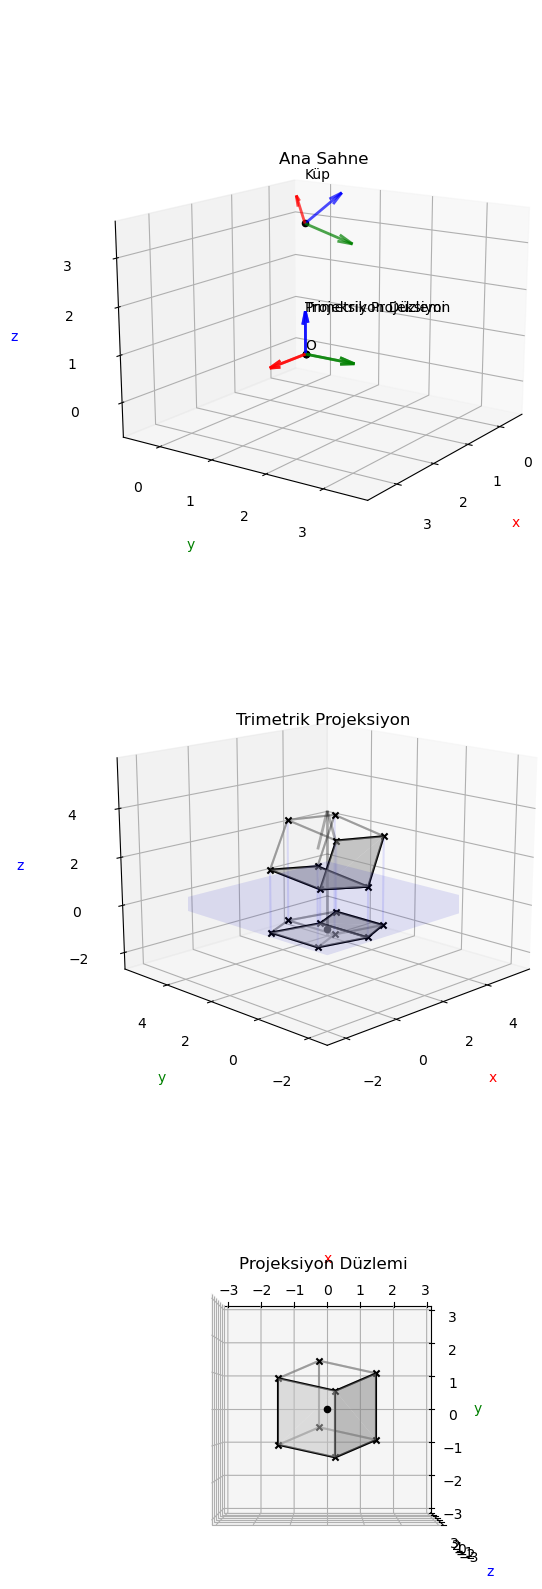

In [11]:
sahneU3_07=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",2) # 2 adet kamera tanımlanacak
sahneU3_07.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU3_07,"Trimetrik Projeksiyon",None)
mycam1.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,True)
mycam2=Camera.Camera(90,8,-90,sahneU3_07,"Projeksiyon Düzlemi",[-2,2])
mycam2.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,False,True,False,False,False)
sahneU3_07.addcamera(mycam1)
sahneU3_07.addcamera(mycam2)
mycube=Cube.Cube(2,2,2,sahneU3_07,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi
axonometricthetaphi=Utilities.calculatefromratios_thetaphi([2/3,1,7/8])
axotheta=axonometricthetaphi[0]
axophi=axonometricthetaphi[1]
#mycube.rotate_y(axotheta)
mycube.rotate_y(-axotheta)
mycube.rotate_x(axophi)
mycube.translate_xyz(0,0,3)
sahneU3_07.addobj(mycube)
sahneU3_07.calculate_positions_oblique(0,0) # beta, alpha
sahneU3_07.show()
mycam2.ax.invert_xaxis()

Dik İzdüşüm Yöntemleri - Aksonometrik (($\beta,\alpha$)=($0,0$)) - Trimetrik ($k\,||x'_p||_2=3/4$, $k\,||y'_p||_2=1$, $k\,||z'_p||_2=7/8$)

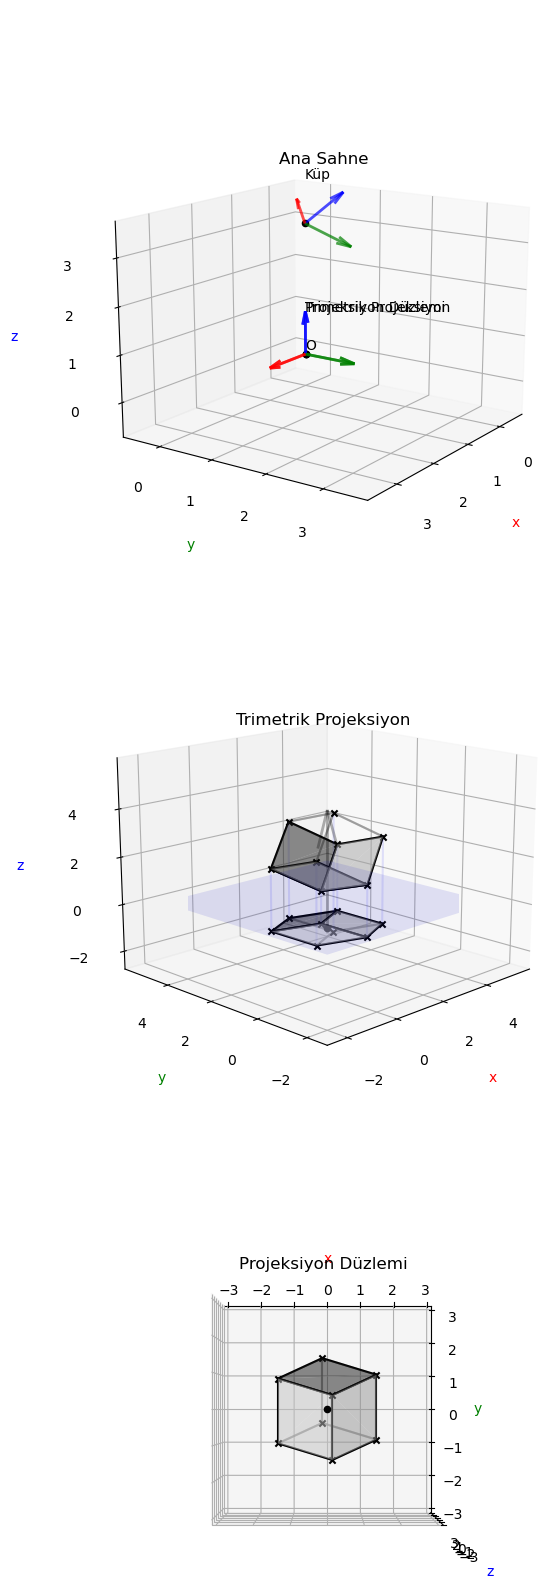

In [12]:
sahneU3_08=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",2) # 2 adet kamera tanımlanacak
sahneU3_08.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU3_08,"Trimetrik Projeksiyon",None)
mycam1.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,True)
mycam2=Camera.Camera(90,8,-90,sahneU3_08,"Projeksiyon Düzlemi",[-2,2])
mycam2.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,False,True,False,False,False)
sahneU3_08.addcamera(mycam1)
sahneU3_08.addcamera(mycam2)
mycube=Cube.Cube(2,2,2,sahneU3_08,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi
axonometricthetaphi=Utilities.calculatefromratios_thetaphi([3/4,1,7/8])
axotheta=axonometricthetaphi[0]
axophi=axonometricthetaphi[1]
#mycube.rotate_y(axotheta)
mycube.rotate_y(-axotheta)
mycube.rotate_x(axophi)
mycube.translate_xyz(0,0,3)
sahneU3_08.addobj(mycube)
sahneU3_08.calculate_positions_oblique(0,0) # beta, alpha
sahneU3_08.show()
mycam2.ax.invert_xaxis()